# Proyecto EML: 2. Recolección y Caracterización de Datos

In [1]:
# Celda 1: Importación de bibliotecas
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

## 2.1. Reunir los Datos (Múltiples Tickers)
Definimos los tickers (^GSPC, ^IBEX, ^IXIC, BTC-USD, UNG) y el rango de fechas.

Este código itera sobre cada ticker, descarga los datos, soluciona el problema del MultiIndex (aplanando las columnas), las convierte a minúsculas y las une en un solo DataFrame data.

In [ ]:
# Celda 2: Descarga y limpieza inicial de columnas 
# --- Parámetros de la Descarga ---
TICKERS = ['^GSPC', '^IBEX', 'BTC-USD', '^IXIC', 'UNG'] #S&P 500, IBEX-35, BTC-USD, NASDAQ y UNG(United States Natural Gas Fund)
START_DATE = '2016-01-01'
END_DATE = '2024-12-31' 

all_data = [] # Lista para guardar los DataFrames individuales

try:
    for ticker in TICKERS:
        print(f"Descargando {ticker}...")
        df = yf.download(ticker, start=START_DATE, end=END_DATE)
        
        # Comprobamos CADA df por si tiene MultiIndex
        if isinstance(df.columns, pd.MultiIndex):
            print(f"Detectado MultiIndex en {ticker}, aplanando...")
            df.columns = df.columns.get_level_values(0)
            
        # 2. Solución a mayúsculas/minúsculas
        df.columns = df.columns.str.lower()
        
        # 3. Añadir la columna 'ticker' para identificar cada activo
        df['ticker'] = ticker
        
        all_data.append(df)
    
    # 4. Combinar todos los DataFrames en uno solo
    data = pd.concat(all_data)
    
    # 5. Ordenar el índice 
    data = data.sort_index()
    
    print(f"\nDatos descargados exitosamente. Total de filas: {len(data)}")
    print("Primeras 5 filas del dataset (ver col 'ticker'):")
    print(data.head())
    print("\nÚltimas 5 filas del dataset (ver col 'ticker'):")
    print(data.tail())
    print("\nTickers únicos en el dataset:")
    print(data['ticker'].unique())
    
except Exception as e:
    print(f"Error al descargar los datos: {e}")
    data = pd.DataFrame()

/var/folders/0h/kjpyb3tx08sbjk1qn_hxnbbc0000gn/T/ipykernel_6055/2420807771.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed


/var/folders/0h/kjpyb3tx08sbjk1qn_hxnbbc0000gn/T/ipykernel_6055/2420807771.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed

Descargando ^GSPC...
Detectado MultiIndex en ^GSPC, aplanando...
Descargando ^IBEX...



/var/folders/0h/kjpyb3tx08sbjk1qn_hxnbbc0000gn/T/ipykernel_6055/2420807771.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/var/folders/0h/kjpyb3tx08sbjk1qn_hxnbbc0000gn/T/ipykernel_6055/2420807771.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed

Detectado MultiIndex en ^IBEX, aplanando...
Descargando BTC-USD...
Detectado MultiIndex en BTC-USD, aplanando...
Descargando ^IXIC...
Detectado MultiIndex en ^IXIC, aplanando...
Descargando UNG...



/var/folders/0h/kjpyb3tx08sbjk1qn_hxnbbc0000gn/T/ipykernel_6055/2420807771.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed

Detectado MultiIndex en UNG, aplanando...

Datos descargados exitosamente. Total de filas: 12377
Primeras 5 filas del dataset (ver col 'ticker'):
Price             close         high          low         open      volume  \
Date                                                                         
2016-01-01   434.334015   436.246002   427.515015   430.721008    36278900   
2016-01-02   433.437988   436.062012   431.869995   434.622009    30096600   
2016-01-03   430.010986   433.743011   424.705994   433.578003    39633800   
2016-01-04  2012.660034  2038.199951  1989.680054  2038.199951  4304880000   
2016-01-04   433.091003   434.516998   429.084015   430.061005    38477500   

Price        ticker  
Date                 
2016-01-01  BTC-USD  
2016-01-02  BTC-USD  
2016-01-03  BTC-USD  
2016-01-04    ^GSPC  
2016-01-04  BTC-USD  

Últimas 5 filas del dataset (ver col 'ticker'):
Price              close          high           low          open  \
Date                              

## 2.2. Analizar las Variables
Tipos de datos y Valores Ausentes

Comprobamos la estructura del DataFrame, los tipos de datos (Dtypes) y la presencia de valores nulos.

In [47]:
# Celda 3: Análisis de Tipos y Nulos
print("--- Análisis de Variables (Tipos y Nulos) ---")
data.info()

print("\n--- Conteo de Nulos por columna ---")
# Es normal ver nulos si las fechas de trading no coinciden
print(data.isna().sum())

--- Análisis de Variables (Tipos y Nulos) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12377 entries, 2016-01-01 to 2024-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   12377 non-null  float64
 1   high    12377 non-null  float64
 2   low     12377 non-null  float64
 3   open    12377 non-null  float64
 4   volume  12377 non-null  int64  
 5   ticker  12377 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 676.9+ KB

--- Conteo de Nulos por columna ---
Price
close     0
high      0
low       0
open      0
volume    0
ticker    0
dtype: int64


Como se puede ver en la salida, los datos poseen 0 valores nulos, por lo que sabemos que en los datos solo estan presentes las fechas en las que el mercado abre.(todos los dias en el caso de bitcoin)

### Distribución Estadística (Por Ticker)
Usamos .groupby('ticker').describe() para calcular las estadísticas básicas (media, std, min, max) de close y volume, separadas por activo.

In [ ]:
# Celda 4: Análisis Estadístico (Agrupado)

print("--- Análisis de Variables (Distribución Estadística por Ticker) ---")

# Agrupamos por ticker para obtener estadísticas separadas y con sentido
# Seleccionamos 'close' y 'volume' como ejemplos clave
stats = data.groupby('ticker')[['close', 'volume']].describe()

# Mostramos 2 decimalesc
print(stats.apply(lambda s: s.apply('{:,.2f}'.format)))

--- Análisis de Variables (Distribución Estadística por Ticker) ---
Price       close                                                       \
            count       mean        std       min       25%        50%   
ticker                                                                   
BTC-USD  3,287.00  22,327.90  22,301.88    364.33  5,540.49  11,358.10   
UNG      2,263.00      72.87      37.66     12.48     40.08      77.12   
^GSPC    2,263.00   3,499.22   1,046.78  1,829.08  2,656.59   3,274.70   
^IBEX    2,301.00   9,186.74   1,105.61  6,107.20  8,574.60   9,157.40   
^IXIC    2,263.00  10,397.36   3,978.99  4,266.84  7,082.28  10,154.63   

Price                             volume                     \
               75%         max     count               mean   
ticker                                                        
BTC-USD  36,763.48  106,140.60  3,287.00  21,233,616,964.63   
UNG         103.52      157.28  2,263.00       2,210,967.46   
^GSPC     4,304.98    6,

Los resultados confirman que los activos tienen escalas de precio y volumen drásticamente diferentes. Por ejemplo, la media del ^IBEX (9,186) es muy distinta a la del ^GSPC (3,499), y su volumen es mucho menor.

Esto justifica la necesidad de normalizar los precios en el siguiente paso.

## 2.3. Análisis Exploratorio de Datos (EDA)
### Visualización de Precios (Normalizados)
Para comparar el rendimiento relativo de los índices, creamos una columna normalized_close. Esta columna recalcula todos los precios partiendo de una base 100 en la fecha de inicio.

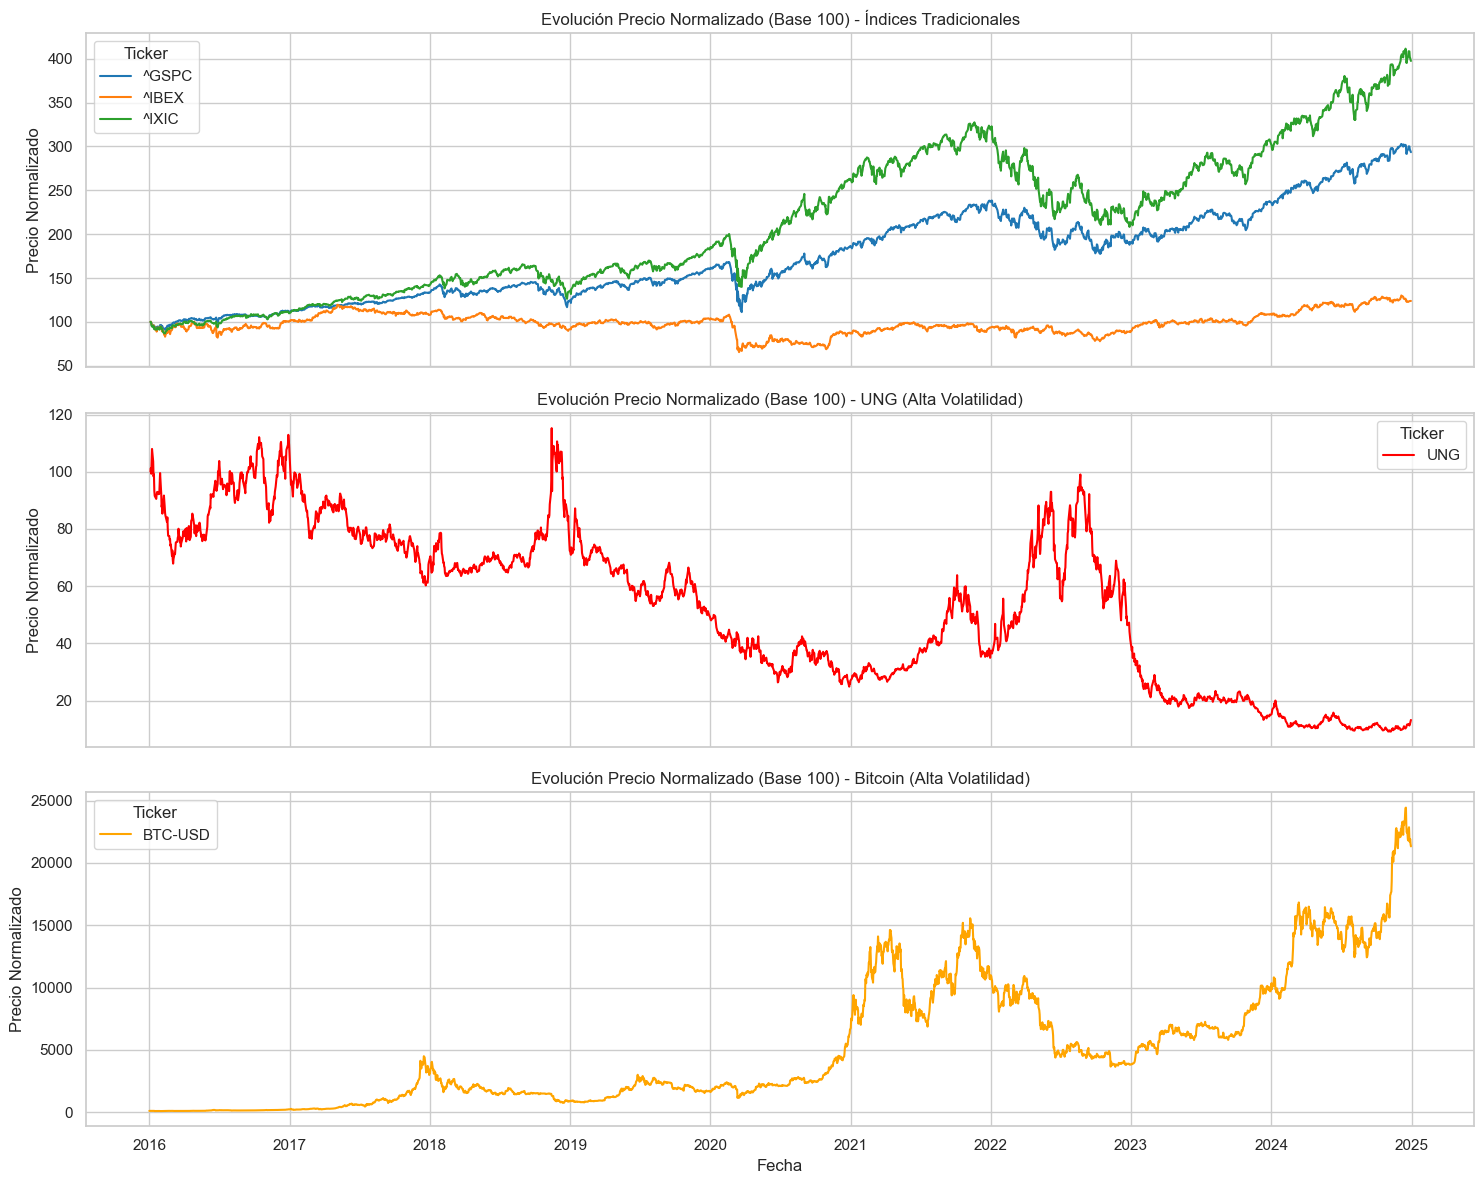

In [ ]:
# Celda 5: Visualización de Precios Normalizados (Separado Índices vs Crypto vs UNG)

# 1. Crear 'normalized_close' base 100
# (Precio_de_hoy / Primer_precio) * 100
data['normalized_close'] = data.groupby('ticker')['close'].transform(lambda x: (x / x.iloc[0]) * 100)

# 2. Separar los datos
indices_data = data[data['ticker'].isin(['^GSPC', '^IBEX', '^IXIC'])]
ung_data = data[data['ticker'] == 'UNG']
btc_data = data[data['ticker'] == 'BTC-USD']

# 3. Crear Gráfica con 2 Subplots (Paneles)
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Panel 1: Índices Tradicionales
sns.lineplot(data=indices_data, x=indices_data.index, y='normalized_close', hue='ticker', ax=axes[0], palette='tab10')
axes[0].set_title('Evolución Precio Normalizado (Base 100) - Índices Tradicionales')
axes[0].set_ylabel('Precio Normalizado')
axes[0].legend(title='Ticker')
axes[0].grid(True)

# Panel 2: UNG
# Usamos un color distinto para destacar
sns.lineplot(data=ung_data, x=ung_data.index, y='normalized_close', ax=axes[1], color='red', label='UNG')
axes[1].set_title('Evolución Precio Normalizado (Base 100) - UNG (Alta Volatilidad)')
axes[1].set_ylabel('Precio Normalizado')
axes[1].set_xlabel('Fecha')
axes[1].legend(title='Ticker')
axes[1].grid(True)

#Panel 3: Bitcoin
sns.lineplot(data=btc_data, x=btc_data.index, y='normalized_close', ax=axes[2], color='orange', label='BTC-USD')
axes[2].set_title('Evolución Precio Normalizado (Base 100) - Bitcoin (Alta Volatilidad)')
axes[2].set_ylabel('Precio Normalizado')
axes[2].set_xlabel('Fecha')
axes[2].legend(title='Ticker')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Hemos decidido separarlo en tres graficos ya que el crecimiento de bitcoin ha sido mucho mas pronunciado que los otros indices, vemos que el S&P 500 y el NASDAQ han tenido un crecimiento mayor que el IBEX35, aunque todos han tenido un crecimiento positivo en los últimos años.
El UNG sin embargo, al ser tan volatil, se ha mantenido mas o menos en el mismo precio aunque con mucha variacion.


### Visualización del Volumen
Dado que las escalas de volumen son muy distintas, usamos sns.relplot para crear un gráfico separado (faceta) para cada ticker. 

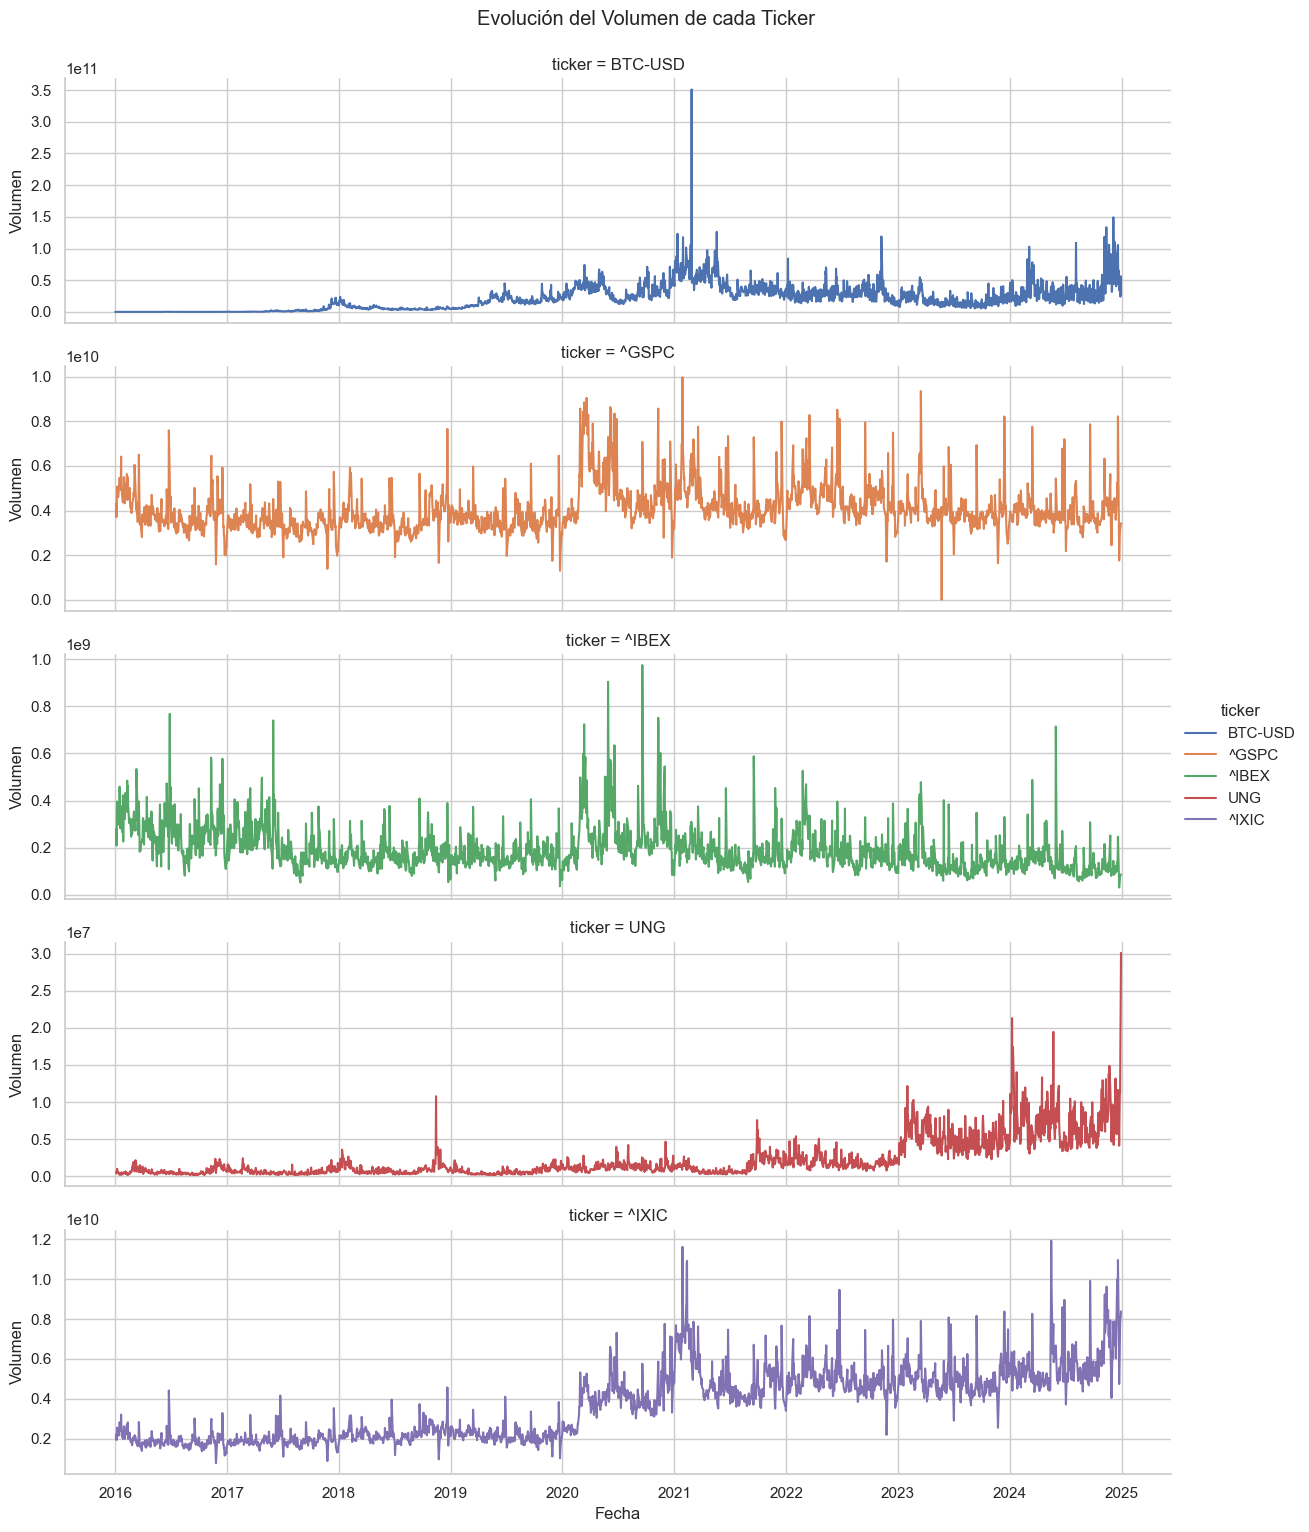

In [51]:
# Celda 6: Visualización del Volumen (con Facetas)
# Usamos relplot de seaborn para crear facetas (subplots) para cada ticker
g = sns.relplot(data=data, x=data.index, y='volume', 
                hue='ticker', col='ticker', col_wrap=1, 
                kind='line', height=3, aspect=4,
                facet_kws={'sharey': False}) # 'facet_kws={'sharey': False}' permite que cada gráfico tenga su propio eje Y y asi que no afecten las diferencias de escala

g.fig.suptitle('Evolución del Volumen de cada Ticker', y=1.02) # y=1.02 para separar el título del gráfico, sino lo ponemos se superpone
g.set_axis_labels('Fecha', 'Volumen')
plt.show()

Los gráficos confirman:
- Escalas Diferentes: Los ejes Y varían (ej. $10^{10}$ para ^IXIC vs $10^9$ para ^IBEX vs $10^{11}$ para Bitcoin).
- Clusters de Volatilidad: Todos los índices muestran picos de volumen en periodos de crisis (ej. 2020).
- Cambio de regimen: El NASDAQ ha experimentado un cambio del volumen medio desde el 2020 en adelante.
- El UNG ha experimentado un aumento drastico de los picos de volumen en los ultimos años

### Creación de Retornos Diarios
Ahora creamos la variable daily_return. Variable que vamos a utilizar en el análisis de correlación y la detección de atípicos.

In [52]:
# Celda 7: Creación de Retornos Diarios
    
# Creamos la columna 'daily_return'
# Agrupamos por ticker para que el pct_change() no calcule el retorno entre el último día de un ticker y el primero del siguiente
data['daily_return'] = data.groupby('ticker')['close'].pct_change()

# df limpio
data_clean = data.dropna(subset=['daily_return'])

print("Se ha creado 'daily_return' para cada ticker.")
print(f"Filas totales: {len(data)}, Filas con retornos válidos: {len(data_clean)}")
print("\nÚltimos retornos calculados:")
print(data_clean[['ticker', 'close', 'daily_return']].tail())

Se ha creado 'daily_return' para cada ticker.
Filas totales: 12377, Filas con retornos válidos: 12372

Últimos retornos calculados:
Price        ticker         close  daily_return
Date                                           
2024-12-30    ^IBEX  11536.799805      0.000451
2024-12-30    ^GSPC   5906.939941     -0.010702
2024-12-30  BTC-USD  92643.210938     -0.009484
2024-12-30    ^IXIC  19486.789062     -0.011928
2024-12-30      UNG     18.030001      0.144036


### Detección de Correlaciones (Entre Tickers)
Para ver cómo se mueven los mercados entre sí, "pivotamos" el DataFrame para tener los retornos de cada ticker como una columna. Sobre esto, calculamos la matriz de correlación (.corr()) y la visualizamos con un heatmap.

--- Matriz de Correlación de Retornos Diarios ---
ticker    BTC-USD       UNG     ^GSPC     ^IBEX     ^IXIC
ticker                                                   
BTC-USD  1.000000  0.010990  0.246795  0.133662  0.268327
UNG      0.010990  1.000000  0.100661  0.028404  0.080495
^GSPC    0.246795  0.100661  1.000000  0.520599  0.946484
^IBEX    0.133662  0.028404  0.520599  1.000000  0.423985
^IXIC    0.268327  0.080495  0.946484  0.423985  1.000000


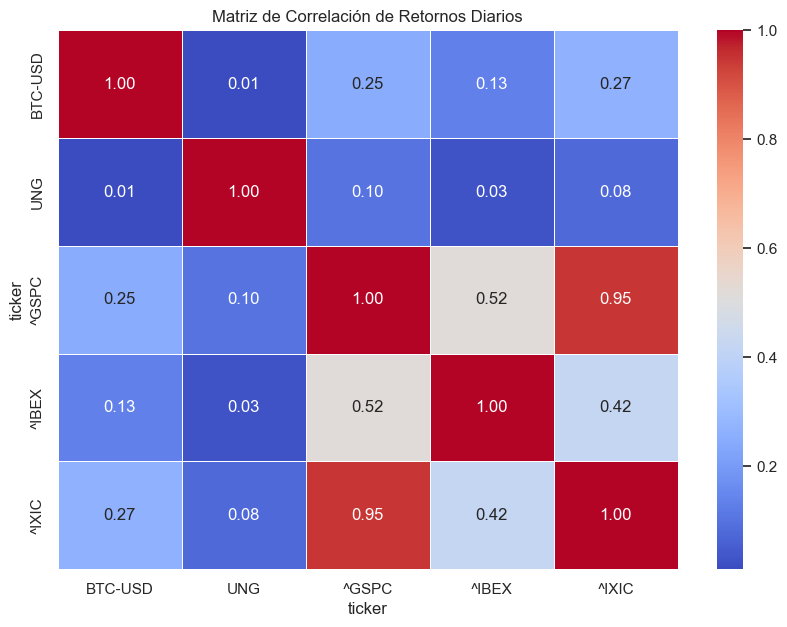

In [53]:
# Celda 8: Matriz de Correlación de Retornos
    
# Para correlacionar, necesitamos un DataFrame donde las columnas sean los tickers y las filas las fechas. (usamos pivot_table)
returns_wide = data_clean.pivot_table(index=data_clean.index, 
                                    columns='ticker', 
                                    values='daily_return')

# .corr() calculará la correlación entre las columnas 
correlation_matrix = returns_wide.corr()

print("--- Matriz de Correlación de Retornos Diarios ---")
print(correlation_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Retornos Diarios')
plt.show()

El heatmap es muy claro:

- EE.UU.: ^GSPC y ^IXIC están altamente correlacionados (0.95). Se mueven casi juntos.
- Europa vs. EE.UU.: ^IBEX tiene una correlación positiva pero mucho más débil (0.52 y 0.42) con los índices de EE. UU.
- Crypto vs. Indices: Es logico que la correlacion no sea alta que hablamos de tipos de activos diferentes, con volatilidades y volumenes muy diferentes.
- Con el UNG sucede lo mismo que con la crypto, la correlacion es baja.

Implicación: Los índices de EE. UU. son algo redundantes entre sí, pero el ^IBEX ofrece diversificación.

### Detección de Valores Atípicos (Retornos)
Finalmente, analizamos la distribución de los retornos diarios de cada ticker. Calculamos sus estadísticas descriptivas y trazamos un histograma superpuesto y un boxplot para visualizar las "colas pesadas".


--- Estadísticas de Retornos Diarios (por Ticker) ---
               count      mean      std       min       25%      50%      75%  \
ticker                                                                          
BTC-USD  3,286.00000   0.00230  0.03632  -0.37170  -0.01250  0.00139  0.01691   
UNG      2,262.00000  -0.00033  0.03345  -0.19125  -0.01863  0.00000  0.01774   
^GSPC    2,262.00000   0.00054  0.01138  -0.11984  -0.00361  0.00072  0.00581   
^IBEX    2,300.00000   0.00017  0.01206  -0.14059  -0.00568  0.00044  0.00625   
^IXIC    2,262.00000   0.00070  0.01372  -0.12321  -0.00507  0.00113  0.00764   

             max  
ticker            
BTC-USD  0.25247  
UNG      0.18899  
^GSPC    0.09383  
^IBEX    0.08573  
^IXIC    0.09346  


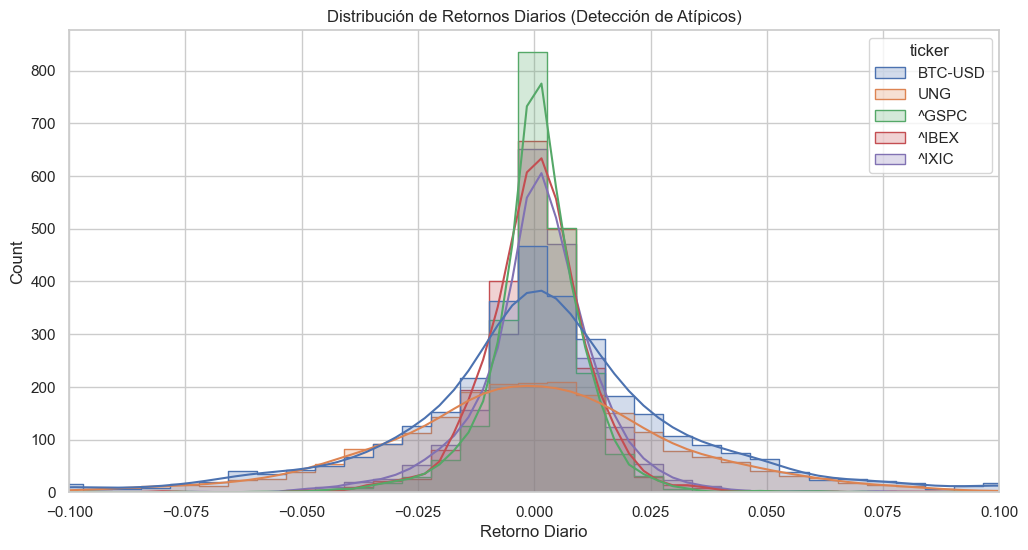

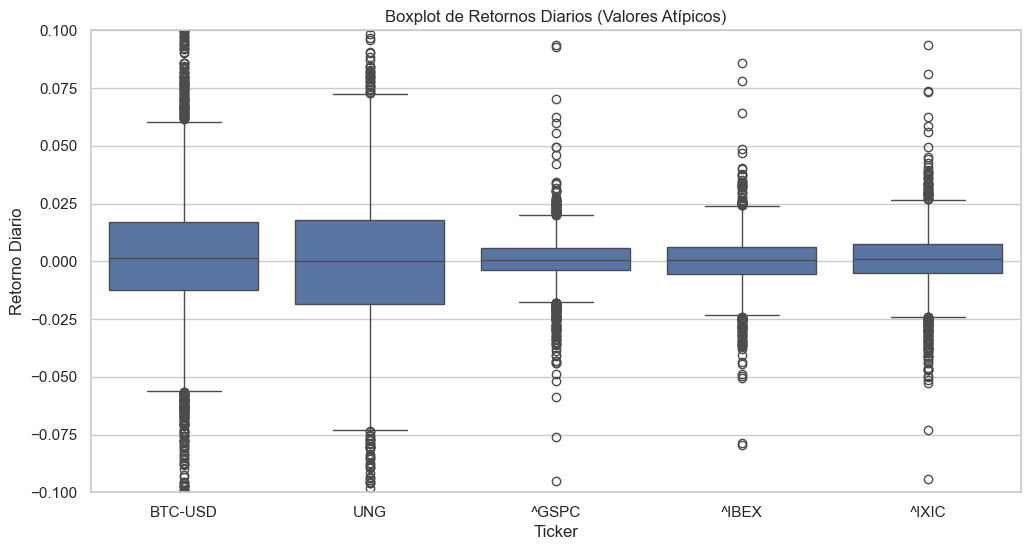

In [54]:
# Celda 9: Creación de Retornos y Detección de Atípicos
        
print(f"\n--- Estadísticas de Retornos Diarios (por Ticker) ---")
print(data_clean.groupby('ticker')['daily_return'].describe().apply(lambda s: s.apply('{:,.5f}'.format)))

# 1. Histograma (superpuestos)
plt.figure(figsize=(12, 6))
# 'element="step"' es bueno para ver histogramas superpuestos
sns.histplot(data_clean, x='daily_return', hue='ticker', kde=True, bins=100, element="step")
plt.title('Distribución de Retornos Diarios (Detección de Atípicos)')
plt.xlabel('Retorno Diario')
plt.xlim(-0.1, 0.1) # Hacemos zoom en el centro, los extremos son atípicos
plt.show()

# 2. Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_clean, x='ticker', y='daily_return')
plt.title('Boxplot de Retornos Diarios (Valores Atípicos)')
plt.xlabel('Ticker')
plt.ylabel('Retorno Diario')
plt.ylim(-0.1, 0.1) # Hacemos zoom para ver el cuerpo del boxplot
plt.show()

Ambos gráficos y la tabla de estadísticas confirman nuestra hipótesis principal:

- No Normalidad: Las distribuciones son "picudas" en general para los 3 indices traidicionales, no campanas de Gauss.
- Colas Pesadas (Outliers): El boxplot es la prueba clave. Muestra una gran cantidad de valores atípicos para los tres índices tanto por encima como por debajo de las cajas. Bitcoin y UNG tienen las cajas mas anchas que el resto, lo que es mas normal teniendo en cuenta que son activos mas volátiles.


**Conclusión del EDA: Los mercados no siguen una distribución normal. Las caídas y subidas extremas ("colas pesadas") son comunes y deben ser consideradas. Nuestro agente de RL debe ser diseñado para ser robusto ante estos eventos atípicos.**

# 3. Preparación de Datos para RL

Aunque los datos financieros de yfinance vienen limpios de estructura, para Reinforcement Learning es obligatorio realizar transformaciones matemáticas. Las redes neuronales no aprenden bien si mezclamos escalas muy distintas (ej. Precios en miles vs Retornos en decimales vs Volumen en billones).

Pasos a realizar:
- Ingeniería de Características (Feature Engineering): Crear indicadores técnicos que den "contexto" al agente (no solo el precio, sino la tendencia y la volatilidad).
- Limpieza de Nulos Generados: Al calcular medias móviles (rolling windows), se crean huecos al inicio que debemos eliminar.
- División Temporal (Train/Test): Separar estrictamente por fecha para no hacer trampas (data leakage).
- Normalización (Escalado): Estandarizar los datos para que la red neuronal converja rápido.

## 3.1. Definición de Funciones de Ingeniería
Definimos las transformaciones matemáticas que convertirán el precio en señales de mercado.

1. Retornos Logarítmicos (log_ret): Indican la ganancia/pérdida inmediata. Son estacionarios y mejores para redes neuronales que los precios absolutos.
2. Tendencia (dist_sma): Calculamos la distancia del precio a sus medias móviles (corta y larga). Esto le dice al agente si el precio está "caro" o "barato" respecto a su tendencia.
3. Momento (rsi): Un oscilador (0-100) para detectar condiciones de sobrecompra o sobreventa.
4. Riesgo (volatility): La desviación estándar de los retornos recientes, midiendo el "miedo" del mercado.

In [ ]:
def calculate_rsi(series, period=14):
    """
    Calcula el Índice de Fuerza Relativa (RSI) en un rango 0-100.
    RSI > 70: Sobrecompra (posible venta).
    RSI < 30: Sobreventa (posible rebote).
    """
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def add_features(df):
    """
    Calcula y añade los indicadores técnicos al DataFrame.
    """
    df_feat = df.copy()
    
    # 1. Retornos Logarítmicos: ln(P_t / P_{t-1}) --> Variable fundamental para la recompensa del agente.
    df_feat['log_ret'] = np.log(df_feat['close'] / df_feat['close'].shift(1))
    
    # 2. Tendencia (Medias Móviles Simples - SMA) --> SMA de corto plazo (10 días) y largo plazo (60 días)
    df_feat['sma_10'] = df_feat['close'].rolling(window=10).mean()
    df_feat['sma_60'] = df_feat['close'].rolling(window=60).mean()
    
    # 3. Distancia a la media (Normalizada): ¿Está el precio muy alejado de la tendencia?
    df_feat['dist_sma_60'] = (df_feat['close'] - df_feat['sma_60']) / df_feat['sma_60']
    
    # 4. Momento (RSI - 14 días)
    df_feat['rsi'] = calculate_rsi(df_feat['close'], period=14)
    
    # 5. Volatilidad (Riesgo) --> Desviación estándar móvil de 20 días de los retornos
    df_feat['volatility'] = df_feat['log_ret'].rolling(window=20).std()
    
    # 6. Limpieza de Nulos Generados --> Eliminamos las filas iniciales que tienen NaNs por el cálculo de ventanas
    df_clean = df_feat.dropna()
    
    return df_clean

## 3.2. División de Datos con "Buffer" y Procesamiento
Aquí aplicamos la estrategia de división inteligente para evitar perder datos de prueba.

In [56]:
# Fecha de corte (Inicio del periodo de prueba)
SPLIT_DATE = '2023-01-01'
# Días de contexto necesarios (debe ser mayor que la ventana máxima, sma_60)
BUFFER_DAYS = 90 

if 'data' in locals() and not data.empty:
    print(f"--- Procesando datos con fecha de corte: {SPLIT_DATE} ---")

    # 1. División de los datos CRUDOS (Solo precios y volumen)
    # Respetamos estrictamente el orden temporal.
    raw_train = data[data.index < SPLIT_DATE].copy()
    raw_test = data[data.index >= SPLIT_DATE].copy()
    
    print(f"Filas Crudas Train: {len(raw_train)}")
    print(f"Filas Crudas Test : {len(raw_test)}")

    # 2. Creación del BUFFER para Test
    # Añadimos los últimos 90 días de Train al principio de Test.
    # Esto permite que el día 1 de Test tenga 90 días de historia para calcular sus medias.
    buffer_data = raw_train.groupby('ticker', group_keys=False).tail(BUFFER_DAYS)
    raw_test_buffered = pd.concat([buffer_data, raw_test]).sort_index()
    
    # 3. Cálculo de Features
    print("\nCalculando indicadores técnicos...")
    # Calculamos en Train (perderá los primeros 60 días por los Nulos)
    feat_train = raw_train.groupby('ticker', group_keys=False).apply(add_features)
    
    # Calculamos en Test con Buffer (perderá los primeros 60 días del buffer, no del test real)
    feat_test_buffered = raw_test_buffered.groupby('ticker', group_keys=False).apply(add_features)
    
    # 4. Recorte del Test (Quitamos el buffer)
    # Volvemos a filtrar desde la fecha de corte. Ahora el día 1 tiene datos válidos.
    feat_test = feat_test_buffered[feat_test_buffered.index >= SPLIT_DATE].copy()
    
    print(f"\n--- Dimensiones Finales (Listos para usar) ---")
    print(f"Train Set Final: {len(feat_train)} filas (Se eliminaron nulos iniciales)")
    print(f"Test Set Final : {len(feat_test)} filas (Completo desde {SPLIT_DATE})")
    
    # Verificación: El primer día del test no debe tener NaNs
    print("\nVerificación del primer día de Test (sin NaNs):")
    print(feat_test[['close', 'sma_60', 'rsi']].head(1))

else:
    print("Error: No hay datos cargados. Ejecuta el apartado 2.")

--- Procesando datos con fecha de corte: 2023-01-01 ---
Filas Crudas Train: 9634
Filas Crudas Test : 2743

Calculando indicadores técnicos...

--- Dimensiones Finales (Listos para usar) ---
Train Set Final: 9339 filas (Se eliminaron nulos iniciales)
Test Set Final : 2743 filas (Completo desde 2023-01-01)

Verificación del primer día de Test (sin NaNs):
Price              close        sma_60       rsi
Date                                            
2023-01-01  16625.080078  17157.376758  46.05346


/var/folders/0h/kjpyb3tx08sbjk1qn_hxnbbc0000gn/T/ipykernel_6055/812710712.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feat_train = raw_train.groupby('ticker', group_keys=False).apply(add_features)
/var/folders/0h/kjpyb3tx08sbjk1qn_hxnbbc0000gn/T/ipykernel_6055/812710712.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feat_test_buffered = raw_test_buffered.groupby('ticker', group_keys=False).ap

## 3.3. Normalización (Escalado)
El escalado es obligatorio para que la red neuronal funcione. Mezclar Volumen ($10^9$) con Retornos ($10^{-2}$) hace que el entrenamiento sea inestable.

Usamos StandardScaler (Media 0, Desv. Std 1).Regla de Oro: Ajustamos (fit) el escalador SOLO con los datos de Entrenamiento. Luego usamos esos parámetros para transformar el Test. Si usáramos datos de Test para escalar, estaríamos filtrando información del futuro (data leakage), invalidando nuestros resultados.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Variables que forman el "ESTADO" (Input de la Red Neuronal)
# NO incluimos el precio absoluto ('close'), usamos retornos y distancias relativas.
feature_cols = ['volume', 'log_ret', 'dist_sma_60', 'rsi', 'volatility']

# Dataframes finales
train_scaled = feat_train.copy()
test_scaled = feat_test.copy()

# Diccionario para guardar escaladores (útil si usamos múltiples tickers)
scalers = {}

print("--- Normalizando Variables ---")

# Iteramos por ticker (aunque ahora sea uno, el código es escalable)
for ticker in train_scaled['ticker'].unique():
    # Máscaras para seleccionar el ticker actual
    mask_train = train_scaled['ticker'] == ticker
    mask_test = test_scaled['ticker'] == ticker
    
    # Inicializar escalador
    scaler = StandardScaler()
    
    # 1. FIT (Aprender media/std) SOLO en TRAIN
    scaler.fit(train_scaled.loc[mask_train, feature_cols]) # feature_cols son las variables que forman el "ESTADO" (no incluimos close)
    
    # 2. TRANSFORM (Aplicar) en TRAIN y TEST
    train_scaled.loc[mask_train, feature_cols] = scaler.transform(train_scaled.loc[mask_train, feature_cols])
    test_scaled.loc[mask_test, feature_cols] = scaler.transform(test_scaled.loc[mask_test, feature_cols])
    
    # Guardamos el scaler para uso futuro
    scalers[ticker] = scaler

print("Normalización completada.")
print("\nVerificación de Estadísticas en Train (Media ~0, Std ~1):")
print(train_scaled[feature_cols].describe().loc[['mean', 'std']].round(2))

--- Normalizando Variables ---
Normalización completada.

Verificación de Estadísticas en Train (Media ~0, Std ~1):
Price  volume  log_ret  dist_sma_60  rsi  volatility
mean      0.0     -0.0          0.0 -0.0        -0.0
std       1.0      1.0          1.0  1.0         1.0


/var/folders/0h/kjpyb3tx08sbjk1qn_hxnbbc0000gn/T/ipykernel_6055/3124979208.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.96905151 -0.96835448 -0.96835156 ... -0.26169683 -0.19018727
 -0.42038308]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_scaled.loc[mask_train, feature_cols] = scaler.transform(train_scaled.loc[mask_train, feature_cols])
/var/folders/0h/kjpyb3tx08sbjk1qn_hxnbbc0000gn/T/ipykernel_6055/3124979208.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-5.18294087e-01 -3.78241392e-01 -2.89632543e-01 -6.78451707e-02
 -2.99955608e-01 -2.64571814e-01 -5.93370425e-01 -4.92551970e-01
 -5.78817382e-02 -1.96117615e-01 -7.02727690e-02  7.44450495e-01
  4.62407231e-01  9.40606089e-01 -2.48162911e-02  3.43012278e-01
  2.55031356e-01  5.00720828e-01  6.6204312

## 3.4. Diccionario de Datos y Exportación

Definimos las variables finales y guardamos los datos procesados para usarlos en el notebook de entrenamiento del agente.

### Diccionario de Variables (Vector de Estado $S_t$):

log_ret

- Descripción: Retorno logarítmico diario.
- Función para el Agente RL: Señal Principal. Indica la ganancia/pérdida inmediata. Es estacionaria.

dist_sma_60

- Descripción: Distancia % a la Media Móvil 60.
- Función para el Agente RL: Tendencia. Indica si el precio está muy extendido (caro/barato) respecto a su tendencia.

rsi

- Descripción: Índice de Fuerza Relativa.
- Función para el Agente RL: Momento. Detecta agotamiento de tendencia (sobrecompra/sobreventa).

volatility

- Descripción: Desviación estándar (20 días).
- Función para el Agente RL: Riesgo. Mide la incertidumbre. Alta volatilidad puede inducir cautela.

volume

- Descripción: Volumen (Normalizado).
- Función para el Agente RL: Confirmación. Valida la fuerza de los movimientos de precio.

close

- Descripción: Precio de Cierre (No escalado).
- Función para el Agente RL: Cálculo de PnL. No entra a la red neuronal, se usa para calcular el valor real de la cartera.

In [58]:
import os

OUTPUT_DIR = 'data_processed'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Iteramos para guardar un archivo por cada ticker (ej. SPY_train.csv)
for ticker in train_scaled['ticker'].unique():
    ticker_name = ticker.replace('^', '')
    
    # Rutas de archivo
    train_path = os.path.join(OUTPUT_DIR, f'{ticker_name}_train.csv')
    test_path = os.path.join(OUTPUT_DIR, f'{ticker_name}_test.csv')
    
    # Filtrar datos del ticker
    t_train = train_scaled[train_scaled['ticker'] == ticker]
    t_test = test_scaled[test_scaled['ticker'] == ticker]
    
    # Guardar CSV (index=True para mantener la fecha)
    t_train.to_csv(train_path)
    t_test.to_csv(test_path)
    
    print(f"Datos guardados para {ticker}:")
    print(f"   - Train: {train_path} ({len(t_train)} filas)")
    print(f"   - Test : {test_path}  ({len(t_test)} filas)")



Datos guardados para BTC-USD:
   - Train: data_processed/BTC-USD_train.csv (2498 filas)
   - Test : data_processed/BTC-USD_test.csv  (730 filas)
Datos guardados para UNG:
   - Train: data_processed/UNG_train.csv (1703 filas)
   - Test : data_processed/UNG_test.csv  (501 filas)
Datos guardados para ^GSPC:
   - Train: data_processed/GSPC_train.csv (1703 filas)
   - Test : data_processed/GSPC_test.csv  (501 filas)
Datos guardados para ^IBEX:
   - Train: data_processed/IBEX_train.csv (1732 filas)
   - Test : data_processed/IBEX_test.csv  (510 filas)
Datos guardados para ^IXIC:
   - Train: data_processed/IXIC_train.csv (1703 filas)
   - Test : data_processed/IXIC_test.csv  (501 filas)
